In [1]:
from diffusers import StableDiffusionXLPipeline, AutoencoderKL, ControlNetModel, StableDiffusionXLControlNetPipeline
import torch
from time import perf_counter
from safetensors.torch import load_file, save_file
from safetensors import safe_open
from collections import OrderedDict
import psutil
import gc
import os

def preload_safetensors_to_cpu(safetensors_path):
    # 使用 safetensors 库读取权重到 CPU 内存
    weights = load_file(safetensors_path, device="cpu")
    return weights

def get_cpu_memory_usage():
    # Get CPU memory usage in MB
    process = psutil.Process()
    mem_info = process.memory_info()
    cpu_memory_rss = mem_info.rss / (1024 ** 3)

    print(f"CPU Memory RSS: {cpu_memory_rss:.2f} GB")
    return cpu_memory_rss

def get_gpu_memory_usage():
    # Get GPU memory usage in MB
    gpu_memory_allocated = torch.cuda.memory_allocated() / (1024 ** 3)
    gpu_memory_reserved = torch.cuda.memory_reserved() / (1024 ** 3)

    print(f"GPU Memory Reserved: {gpu_memory_reserved:.2f} GB")

    return gpu_memory_reserved

/data1/workspace/javeyqiu/miniconda/envs/sd-xl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
gpu_cache = OrderedDict()
cpu_cache = OrderedDict()
cpu_memory_usage = []
gpu_memory_usage = []

for i in range(1, 5):
    controlnet_depth = ControlNetModel.from_pretrained(
        "diffusers/controlnet-depth-sdxl-1.0",
        variant="fp16",
        use_safetensors=True,
        torch_dtype=torch.float16,
        cache_dir='/data1/workspace/javeyqiu/models/huggingface/hub'
    ).to("cuda")
    # controlnet_depth = torch.load('./stable-diffusion-xl-base-1.0/controlnet_depth.bin').to("cuda")
    gpu_cache[f'diffusers/controlnet-depth-sdxl-1.0-{i}'] = controlnet_depth
    
    # Record memory usage
    cpu_memory_usage.append(get_cpu_memory_usage())
    gpu_memory_usage.append(get_gpu_memory_usage())

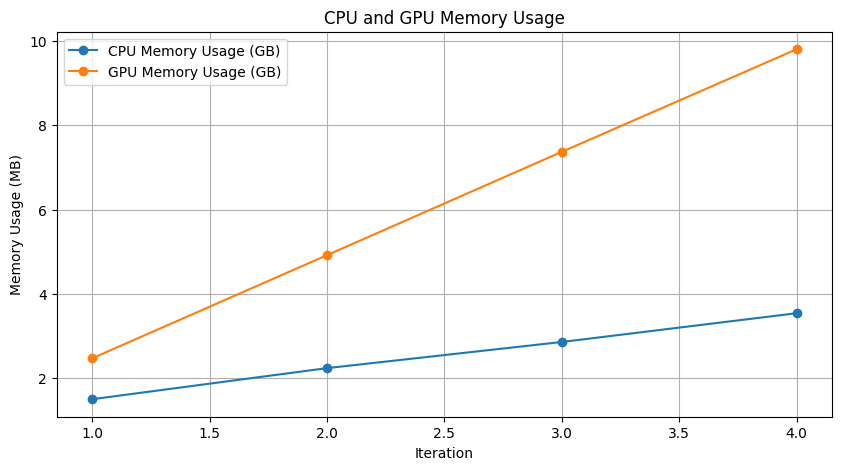

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), cpu_memory_usage, label='CPU Memory Usage (GB)', marker='o')
plt.plot(range(1, 5), gpu_memory_usage, label='GPU Memory Usage (GB)', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (MB)')
plt.title('CPU and GPU Memory Usage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cpu_memory_usage_2 = []
gpu_memory_usage_2 = []
for i in range(5, 15):
    controlnet_depth = ControlNetModel.from_pretrained(
        "diffusers/controlnet-depth-sdxl-1.0",
        variant="fp16",
        use_safetensors=True,
        torch_dtype=torch.float16,
        cache_dir='/data1/workspace/javeyqiu/models/huggingface/hub'
    ).to("cuda")
    # controlnet_depth = torch.load('./stable-diffusion-xl-base-1.0/controlnet_depth.bin').to("cuda")
    gpu_cache[f'diffusers/controlnet-depth-sdxl-1.0-{i}'] = controlnet_depth

    model_name, model = gpu_cache.popitem(last=False)
    model.to('cpu')
    cpu_cache[model_name] = model
    cpu_memory_usage_2.append(get_cpu_memory_usage())
    gpu_memory_usage_2.append(get_gpu_memory_usage())

CPU Memory RSS: 5.70 GB
GPU Memory Reserved: 12.25 GB
CPU Memory RSS: 7.25 GB
GPU Memory Reserved: 12.25 GB
CPU Memory RSS: 9.19 GB
GPU Memory Reserved: 12.28 GB
CPU Memory RSS: 11.15 GB
GPU Memory Reserved: 12.28 GB
CPU Memory RSS: 13.32 GB
GPU Memory Reserved: 12.31 GB
CPU Memory RSS: 15.62 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 17.93 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 20.22 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 22.54 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 24.86 GB
GPU Memory Reserved: 12.34 GB


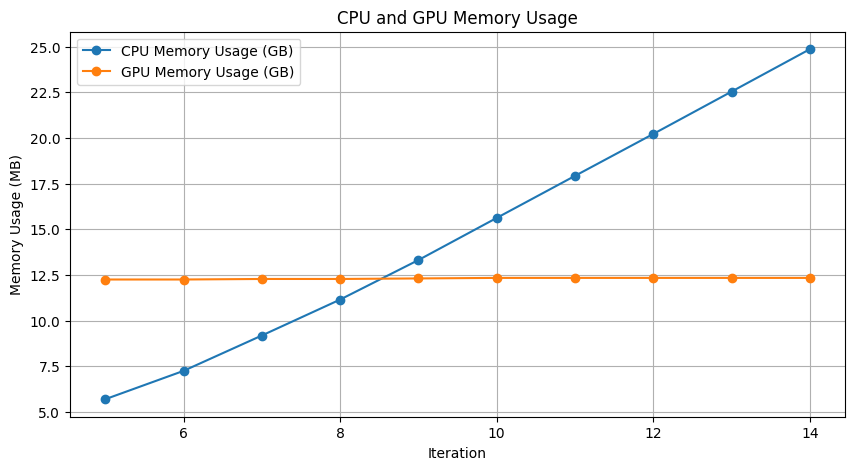

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(5, 15), cpu_memory_usage_2, label='CPU Memory Usage (GB)', marker='o')
plt.plot(range(5, 15), gpu_memory_usage_2, label='GPU Memory Usage (GB)', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (MB)')
plt.title('CPU and GPU Memory Usage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cpu_memory_usage_3 = []
gpu_memory_usage_3 = []
for i in range(15, 50):
    controlnet_depth = ControlNetModel.from_pretrained(
        "diffusers/controlnet-depth-sdxl-1.0",
        variant="fp16",
        use_safetensors=True,
        torch_dtype=torch.float16,
        cache_dir='/data1/workspace/javeyqiu/models/huggingface/hub'
    ).to("cuda")
    # controlnet_depth = torch.load('./stable-diffusion-xl-base-1.0/controlnet_depth.bin').to("cuda")
    gpu_cache[f'diffusers/controlnet-depth-sdxl-1.0-{i}'] = controlnet_depth

    model_name, model = gpu_cache.popitem(last=False)
    model.to('cpu')
    cpu_cache[model_name] = model

    _, model_cpu = cpu_cache.popitem(last=False)
    del model_cpu
    gc.collect()

    cpu_memory_usage_3.append(get_cpu_memory_usage())
    gpu_memory_usage_3.append(get_gpu_memory_usage())

CPU Memory RSS: 27.19 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 27.75 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 28.19 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 28.69 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 29.62 GB
GPU Memory Reserved: 12.34 GB
CPU Memory RSS: 30.04 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 30.82 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 31.28 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 31.81 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 32.40 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 33.06 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 33.39 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 33.59 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 33.71 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 33.83 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 33.91 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 34.02 GB
GPU Memory Reserved: 12.37 GB
CPU Memory RSS: 34.06 GB
GPU Memory Reserved: 12.37 GB
CPU Memory

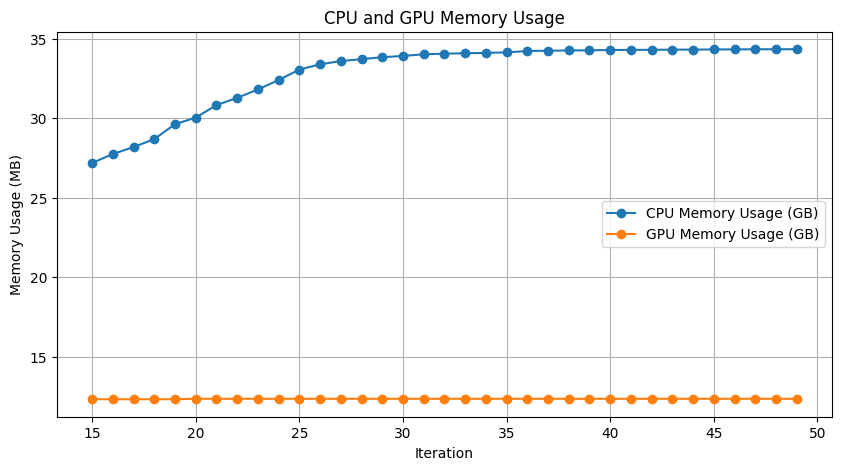

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(15, 50), cpu_memory_usage_3, label='CPU Memory Usage (GB)', marker='o')
plt.plot(range(15, 50), gpu_memory_usage_3, label='GPU Memory Usage (GB)', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (MB)')
plt.title('CPU and GPU Memory Usage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cpu_memory_usage_4 = []
gpu_memory_usage_4 = []
gpu_cache = OrderedDict()
cpu_cache = OrderedDict()

for i in range(1, 20):
    controlnet_depth = ControlNetModel.from_pretrained(
        "diffusers/controlnet-depth-sdxl-1.0",
        variant="fp16",
        use_safetensors=True,
        torch_dtype=torch.float16,
        cache_dir='/data1/workspace/javeyqiu/models/huggingface/hub'
    ).to("cuda")
    gpu_cache[f'diffusers/controlnet-depth-sdxl-1.0-{i}'] = controlnet_depth
    model_name, model = gpu_cache.popitem(last=False)

    model.to('cpu')
    cpu_cache[model_name] = model
    
    _, model_cpu = cpu_cache.popitem(last=False)
    del model_cpu
    gc.collect()

    cpu_memory_usage_4.append(get_cpu_memory_usage())
    gpu_memory_usage_4.append(get_gpu_memory_usage())

CPU Memory RSS: 5.90 GB
GPU Memory Reserved: 3.86 GB
CPU Memory RSS: 6.54 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 6.82 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.12 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.14 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.16 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.23 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.41 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.35 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.37 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.56 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.58 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.64 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.64 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.35 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.07 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.24 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 7.26 GB
GPU Memory Reserved: 3.89 GB
CPU Memory RSS: 6.86 GB
GPU Memory Reserved: 3

LORA

In [1]:
from onediff.infer_compiler import oneflow_compile
from onediff.torch_utils import TensorInplaceAssign
from time import perf_counter
from diffusers import StableDiffusionXLPipeline, AutoencoderKL, ControlNetModel,DiffusionPipeline
from onediffx.lora import (
    load_and_fuse_lora,
    unfuse_lora,
    update_graph_with_constant_folding_info,
)
import torch

/data1/workspace/javeyqiu/miniconda/envs/sd-xl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
start = perf_counter()
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix", 
    torch_dtype=torch.float16,
    cache_dir='/data1/workspace/javeyqiu/models/huggingface/hub'
).to("cuda")
pipe = StableDiffusionXLPipeline.from_pretrained("/data1/workspace/javeyqiu/models/stable-diffusion-xl-base-1.0", 
                                         torch_dtype=torch.float16, 
                                         vae=vae,
                                         use_safetensors=True, 
                                         variant="fp16").to("cuda")
endtime = perf_counter()-start
print("加载一个 SD-XL 基座模型 所需时间为: ", endtime, "s")
# get_cpu_memory_usage()
# get_gpu_memory_usage()
pipe.unet = oneflow_compile(pipe.unet)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]


加载一个 SD-XL 基座模型 所需时间为:  2.9443248631432652 s


In [5]:
# onediffx test

LORA_MODEL_ID = "/data1/workspace/javeyqiu/models/huggingface/hub/models--CiroN2022--toy-face/snapshots/da6e6d42b49674cf43fc05d8a6a4899651ac2e9b"
LORA_FILENAME = "toy_face_sdxl.safetensors"

# LORA_MODEL_ID = "/data1/workspace/javeyqiu/projects/SD-xl/test/sample-lora/"
# LORA_FILENAME = "lora.safetensors"

load_start = perf_counter()
load_and_fuse_lora(pipe, LORA_MODEL_ID, weight_name=LORA_FILENAME, lora_scale=1.0)
print('Load_and_fuse_lora time', round(perf_counter() - load_start, 1))

Load_and_fuse_lora time 0.9


In [3]:
start = perf_counter()
pipe.load_lora_weights("CiroN2022/toy-face", 
                       weight_name="toy_face_sdxl.safetensors", 
                       adapter_name="toy",
                       cache_dir='/data1/workspace/javeyqiu/models/huggingface/hub')
endtime = perf_counter()-start
print("加载一个 SD-XL 基座模型 所需时间为: ", endtime, "s")
# get_cpu_memory_usage()
# get_gpu_memory_usage()

加载一个 SD-XL 基座模型 所需时间为:  2.08938270714134 s


In [ ]:
for i in range(10):
    start = perf_counter()
    pipe.load_lora_weights("CiroN2022/toy-face", 
                        weight_name="toy_face_sdxl.safetensors", 
                        adapter_name="toy",
                        cache_dir='/data1/workspace/javeyqiu/models/huggingface/hub')
    pipe.unload_lora_weights()
    endtime = perf_counter()-start
    print("加载一个Lora 模型 所需时间为: ", endtime, "s")
    get_cpu_memory_usage()
    get_gpu_memory_usage()

In [2]:
from diffusers import StableDiffusionXLPipeline
from huggingface_hub import hf_hub_download
import gc
import os
import shutil
import time
import torch

NUM_WAMRUP_ITERS = 5
LOCAL_LORA_MODELS_PATH = "my-loras"
NUM_LORAS = 10


def ensure_lora_is_on_gpu(t2i_pipe, lora_name: str):
    loaded_loras = t2i_pipe.get_list_adapters().get("unet", [])
    if lora_name in loaded_loras:
        t2i_pipe.set_lora_device([lora_name], "cuda")
    else:
        start = time.time()
        t2i_pipe.load_lora_weights(os.path.join(LOCAL_LORA_MODELS_PATH, lora_name),
                                   weight_name="lora.safetensors",
                                   local_files_only=True,
                                   adapter_name=lora_name)
        print(f"Successfully loaded LoRA {lora_name}. {len(loaded_loras) + 1} LoRAs are currently in memory.")
        end = time.time()
        print(f"Load took {end-start} seconds.")


def infer(t2i_pipe, prompt, adapter):
    ensure_lora_is_on_gpu(t2i_pipe, adapter)
    t2i_pipe.set_adapters(adapter)
    assert len(t2i_pipe.get_active_adapters()) == 1
    print("Active adapters:", t2i_pipe.get_active_adapters())
    
    start = time.time()
    images = t2i_pipe(
        prompt=prompt,
        num_images_per_prompt=1,
        # Normally this should be set to ~50, but here we don't care about quality.
        num_inference_steps=1
    ).images
    end = time.time()
    t2i_pipe.set_lora_device([adapter], "cpu")
    t2i_pipe.disable_lora()
    print(f"{t2i_pipe.get_active_adapters()}")

    gc.collect()
    torch.cuda.empty_cache()
    
    print(f"Offloaded LoRA {adapter} from GPU to CPU memory.")
    print(f"Inference took {end-start} seconds.")
    return images

### Step 0: Download one LoRA model and make copies of it (to simulate the case when we have many different LoRAs).
if not os.path.exists(LOCAL_LORA_MODELS_PATH):
    hf_hub_download(repo_id="storia/sample-lora", filename="lora.safetensors", local_dir="sample-lora")
    for i in range(NUM_LORAS):
        lora_path = f"{LOCAL_LORA_MODELS_PATH}/lora{i}"
        shutil.copytree("sample-lora", lora_path)
print(f"Set up {NUM_LORAS} LoRAS.")

### Step 1: Load the model
t2i_pipe = StableDiffusionXLPipeline.from_pretrained(
    "/data1/workspace/javeyqiu/models/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")
print(f"Loaded the base model.")

print("Running warmup iterations:")
for _ in range(NUM_WAMRUP_ITERS):
    _ = t2i_pipe("okay", num_inference_steps=1).images[0]

### Step 3: Run inference, once with each LoRA model
for i in range(NUM_LORAS):
    print(f"Calling inference with LoRA {i}")
    infer(t2i_pipe, prompt="unicorn in a fishbowl", adapter=f"lora{i}")

Set up 30 LoRAS.


/tmp/ipykernel_3571061/531199396.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('gpu-memory.csv', sep=", ")


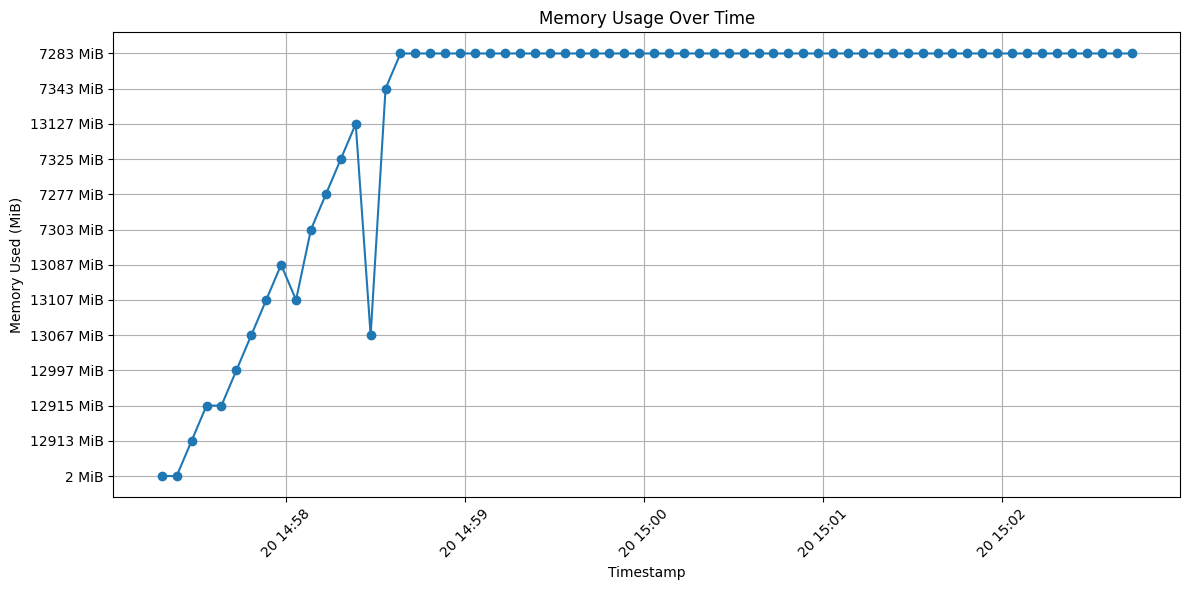

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('gpu-memory.csv', sep=", ")

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['memory.used [MiB]'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Memory Used (MiB)')
plt.title('Memory Usage Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()